In [43]:
import os
import zipfile

In [44]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip

--2023-02-13 21:23:10--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.213.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/tmp/databasesLoadData.zip’

/tmp/databasesLoadD 100%[===================>]  68.34M   159MB/s    in 0.4s    

2023-02-13 21:23:11 (159 MB/s) - ‘/tmp/databasesLoadData.zip’ saved [71662510/71662510]



In [45]:
local_zip = "/tmp/databasesLoadData.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/tmp/databasesLoadData")
zip_ref.close()

In [46]:
import json
import codecs
import requests

from PIL import Image
from io import BytesIO

import numpy as np
import matplotlib.pyplot as plt

# Json

In [47]:
url = "/tmp/databasesLoadData/sign_mnist_json/data.json"

In [48]:
data_json = []
with codecs.open(url,"rU","utf-8") as js:
  for line in js:
    data_json.append(json.loads(line))

print(f"{len(data_json)} images")

9 images


In [49]:
images = []

for data in data_json:
  response = requests.get(data["content"])
  img = np.asarray(Image.open(BytesIO(response.content)))
  images.append([img,data["label"]])

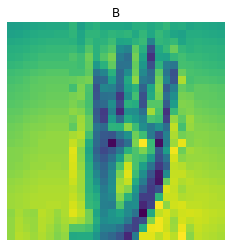

In [50]:
plt.imshow(images[0][0].reshape(28,28));
plt.title(images[0][1].title());
plt.axis(False);

# Json Base64

In [51]:
import base64

In [52]:
url = "/tmp/databasesLoadData/sign_mnist_base64/data.json"

In [53]:
with open(url) as f:
  data = json.load(f)

print(data)

{'b': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOhS246VBdyJbqyDmbaGVSOuWxTUk3XckDKcGVkjI/2VBOf1qcwc9K00i4rnNbCLrcSPMkQKJ97PUNnHHtmrllEf7US3dSJIEklcEdd7DBHtjP5VrGLmrSpxWHewQnxNHNOBsAJOfYZpvh8zXup394xPkKBAg9SDk/lx+db5j5pCcICO+K47X7+cL5uRv2kZxXW6TaRWek20UIIBQOSepZhkk/iasMxDV//Z'}


In [54]:
base64_img_bytes = data['b'].encode('utf-8')
path_img = "/tmp/decoded_images.png"
with open(path_img,"wb") as file_to_save:
  decoded_image_data = base64.decodebytes(base64_img_bytes)
  file_to_save.write(decoded_image_data)

In [55]:
img = Image.open(path_img)
img

# CSV

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 

In [57]:
train = pd.read_csv("/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/tmp/databasesLoadData/sign_mnist_test/sign_mnist_test.csv")

In [58]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [59]:
train.shape

(27455, 785)

In [60]:
labels = train['label'].values

In [61]:
train.drop('label', axis = 1, inplace = True)


In [62]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


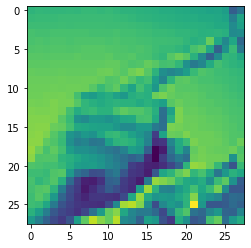

In [63]:
images = train.values
plt.imshow(images[1].reshape(28,28));

# Data Cleaning

In [64]:
train = pd.read_csv("/tmp/databasesLoadData/sign_mnist_train/sign_mnist_train_clean.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


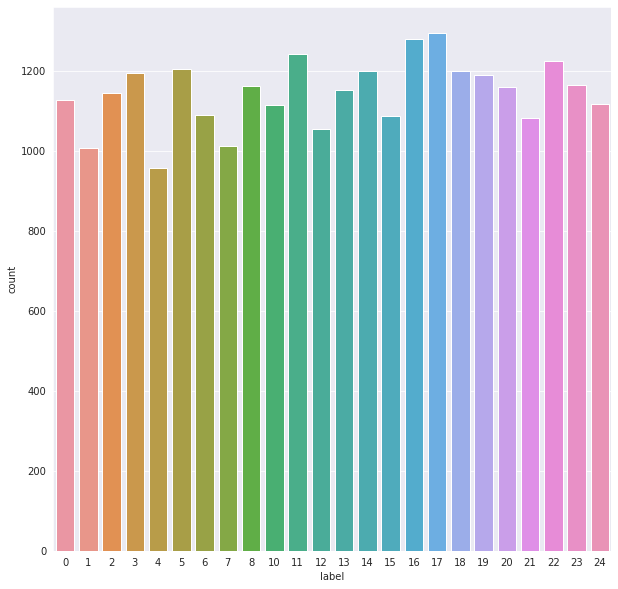

In [67]:
plt.figure(figsize = (10,10));
sns.set_style("darkgrid");
sns.countplot(train["label"]);

for unbalanced data: https://towardsdatascience.com/4-ways-to-improve-class-imbalance-for-image-data-9adec8f390f1

In [68]:
y_train = train["label"]
y_test = test["label"]
train.drop(["label"],axis=1,inplace=True)
test.drop(["label"],axis=1,inplace=True)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: object(784)
memory usage: 164.2+ MB


In [71]:
train.dtypes

pixel1      object
pixel2      object
pixel3      object
pixel4      object
pixel5      object
             ...  
pixel780    object
pixel781    object
pixel782    object
pixel783    object
pixel784    object
Length: 784, dtype: object

In [78]:
unique_labels = sorted(y_train.unique())
print(unique_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [79]:
train.isnull().values.any()

False

In [84]:
train[train.duplicated()]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [83]:
train.drop([317,487,595,689,802,861],axis=0,inplace=True)

In [87]:
train[train["pixel1"] == "fwefew"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
727,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


In [89]:
train[train["pixel1"].str.match(r'(\D+)')==True]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
727,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


In [90]:
train.drop([727],axis=0,inplace=True)

In [91]:
train = train.astype(str).astype(int)/255
test = test.astype(str).astype(int)/255